In [1]:
import pandas as pd
import matplotlib.pyplot as plt

o que eu quero?
1. Qual a região com maior número de vendedores?
2. Qual vendedor vendeu mais?
3. Qual o ranking da categoria de produtos?

In [2]:
df_local = pd.read_csv("olist_geolocation_dataset.csv")
df_pedidos = pd.read_csv("olist_order_items_dataset.csv")
df_vendedores = pd.read_csv("olist_sellers_dataset.csv")
df_produtos = pd.read_csv("olist_products_dataset.csv")

In [3]:
df_vendedores.columns


Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [4]:
df_local.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [5]:
df_pedidos.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [6]:
df_total_vendedores = pd.merge(df_vendedores, df_local, left_on=['seller_zip_code_prefix'] , right_on=['geolocation_zip_code_prefix'], how='inner')

In [7]:
df_total_vendedores.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [8]:
df_total = pd.merge(df_total_vendedores, df_pedidos, on=["seller_id"], how='inner')
df_total

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895499,-47.061944,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.2,9.56
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895499,-47.061944,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.7,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16252414,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.011130,-45.592347,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252415,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.013452,-45.584299,taubaté,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252416,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.009155,-45.592019,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52
16252417,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,12051,-23.009019,-45.584925,taubate,SP,f7b6b85f6fd2cf9aac15731dca998844,1,179bb56045bec397c52ef3c8183dabb6,2017-03-31 10:10:27,12.5,14.52


In [18]:
df_total['seller_id'].nunique()

3088

In [9]:
df_total.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'order_id', 'order_item_id',
       'product_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [10]:
drop_colunas = ['geolocation_lat', 'geolocation_lng', 'order_id','shipping_limit_date', 'freight_value', 'order_item_id', 'seller_city']
df_total = df_total.drop(drop_colunas, axis = 1)
df_total

,seller_id,seller_zip_code_prefix,seller_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,product_id,price
0,3442f8959a84dea7ee197c632cb2df15,13023,SP,13023,campinas,SP,ffb64e34a37740dafb6c88f1abd1fa61,106.2
1,3442f8959a84dea7ee197c632cb2df15,13023,SP,13023,campinas,SP,f4621f8ad6f54a2e3c408884068be46d,101.7
2,3442f8959a84dea7ee197c632cb2df15,13023,SP,13023,campinas,SP,325a06bcce0da45b7f4ecf2797dd40e4,10.8
3,3442f8959a84dea7ee197c632cb2df15,13023,SP,13023,campinas,SP,ffb64e34a37740dafb6c88f1abd1fa61,106.2
4,3442f8959a84dea7ee197c632cb2df15,13023,SP,13023,campinas,SP,f4621f8ad6f54a2e3c408884068be46d,101.7
...,...,...,...,...,...,...,...,...
16252414,9e25199f6ef7e7c347120ff175652c3b,12051,SP,12051,taubate,SP,179bb56045bec397c52ef3c8183dabb6,12.5
16252415,9e25199f6ef7e7c347120ff175652c3b,12051,SP,12051,taubaté,SP,179bb56045bec397c52ef3c8183dabb6,12.5
16252416,9e25199f6ef7e7c347120ff175652c3b,12051,SP,12051,taubate,SP,179bb56045bec397c52ef3c8183dabb6,12.5
16252417,9e25199f6ef7e7c347120ff175652c3b,12051,SP,12051,taubate,SP,179bb56045bec397c52ef3c8183dabb6,12.5


(array([0, 1, 2]), [Text(0, 0, 'SP'), Text(1, 0, 'MG'), Text(2, 0, 'PR')])

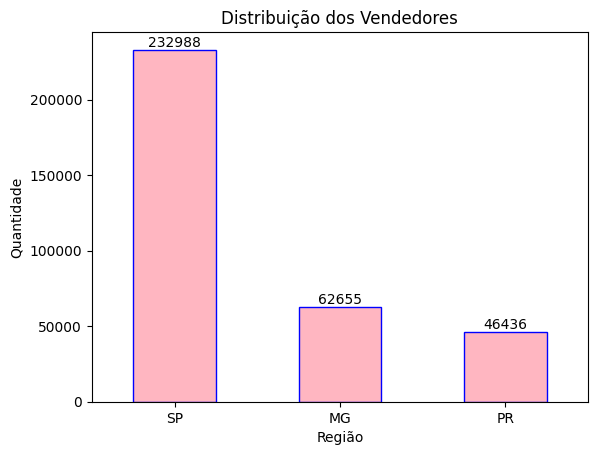

In [24]:
# contar a frequencia de cada estado na coluna geolocation_state e seleciona os 3 estados com maior numero de vendedores
vendedores_por_estado = df_total_vendedores['geolocation_state'].value_counts().head(3)

# plotar o grafico de barras
barras = vendedores_por_estado.plot(kind='bar', edgecolor = "blue", color="lightpink")

# definindo a legenda dos eixos
plt.title("Distribuição dos Vendedores")
plt.xlabel("Região")
plt.ylabel("Quantidade")

# criar a etiqueta das barras
for i in barras.containers:
    barras.bar_label(i, label_type='edge')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, '4a3ca9315b744ce9f8e9374361493884'),
  Text(1, 0, '46dc3b2cc0980fb8ec44634e21d2718e'),
  Text(2, 0, '4869f7a5dfa277a7dca6462dcf3b52b2')])

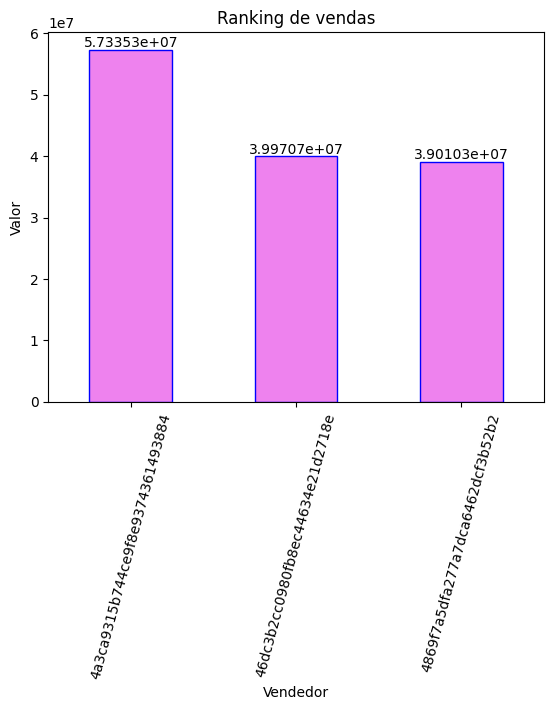

In [21]:
receita_por_vendedor = df_total.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(3)
barras2= receita_por_vendedor.plot(kind = 'bar', x='seller_id', y='price', edgecolor = "blue", color = "violet")
# definindo a legenda dos eixos
plt.title("Ranking de vendas")
plt.xlabel("Vendedor")
plt.ylabel("Valor")

# criar a etiqueta das barras
for i in barras2.containers:
    barras2.bar_label(i, label_type='edge')
plt.xticks(rotation=75)

In [19]:
receita_por_vendedor

seller_id
4a3ca9315b744ce9f8e9374361493884    57335255.12
46dc3b2cc0980fb8ec44634e21d2718e    39970691.28
4869f7a5dfa277a7dca6462dcf3b52b2    39010347.10
Name: price, dtype: float64

In [14]:
df_prod_total = pd.merge(df_pedidos, df_produtos, on=['product_id'], how = 'inner')

In [15]:
df_prod_total.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

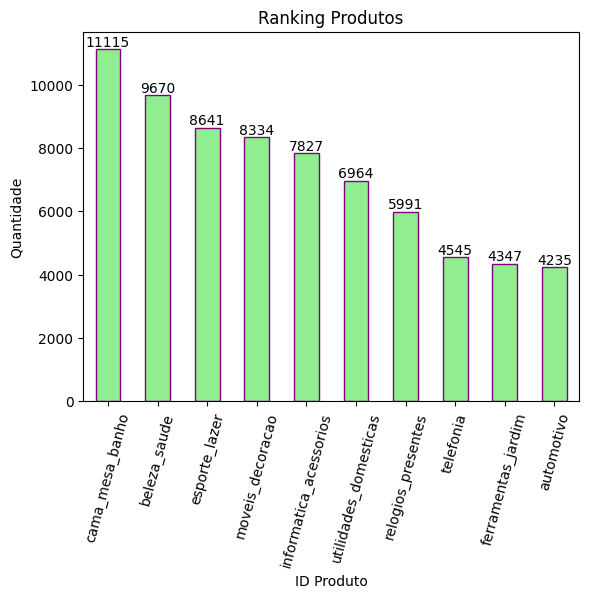

In [17]:
produto_mais_vendido = df_prod_total.groupby('product_category_name')['order_id'].count().sort_values(ascending=False).head(10)
barras3 = produto_mais_vendido.plot(kind = 'bar', edgecolor = 'purple', color = 'lightgreen')

plt.title("Ranking Produtos")
plt.xlabel("ID Produto")
plt.ylabel("Quantidade")

plt.xticks(rotation=75)

for i in barras3.containers:
    barras3.bar_label(i, label_type='edge')